In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Alexa-Dataset - Alexa-Dataset.csv')

In [ ]:
df.head()

In [5]:
df.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews    80
feedback             0
dtype: int64

In [6]:
df['verified_reviews']=df['verified_reviews'].fillna("missing")
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
print(df['feedback'])

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


# (I) Plot a graph of Positive and Negative Feedback

In [8]:
feedback_counts = df['feedback'].value_counts()

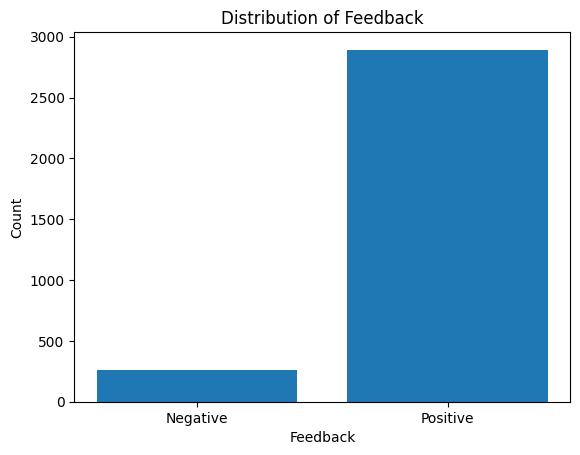

In [9]:
plt.bar(feedback_counts.index, feedback_counts.values)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


# (II) Convert the review text into lowercase.

In [10]:
df['cleaned_text'] = df['verified_reviews'].apply(lambda x: x.lower())
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


# (III) Remove all punctuations from review text.

In [11]:
import string
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


# (IV) Remove emoticons and emojis from the text

In [12]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 7.6 MB/s eta 0:00:00


In [33]:
import re
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs -
 u"\U0001F680-\U0001F6FF" # transport & map symbols -
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)



In [34]:

df['cleaned_text'] = df['cleaned_text'].apply(lambda x:remove_emoji(x))

In [35]:

df['cleaned_text'][2012]

'i was suppose to get the “free” lightbulb with purchase it did not come with echo upon reading more carefully it says to click a box to receive free bulb  of course i want the free bulb who wouldn’t just a sneaky way for them to get out of having to give so many “ free”  bulbs away disappointed  i have yet to set up my echo our first purchase on any alexia device debating if we want to keep it it did come quickly with my prime membership'

# (V) Tokenize the review text into words.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

import nltk
from nltk.tokenize import word_tokenize
df['tokenized_text'] = df['cleaned_text'].apply(lambda x:word_tokenize(x))

In [ ]:
df['tokenized_text']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: tokenized_text, Length: 3150, dtype: object

# (VI) Remove the Stopwords from the tokenized text.

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = set(stopwords.words('english'))

In [ ]:
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in sw])

In [ ]:
df['filtered_text']

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [music]
                              ...                        
3145                    [perfect, kids, adults, everyone]
3146    [listening, music, searching, locations, check...
3147    [love, things, running, entire, home, tv, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [good]
Name: filtered_text, Length: 3150, dtype: object